# 3.6 最適化と勾配法

## 3.6.1 深層学習と最適化

機械学習や深層学習において、学習とは、一般的に予測の誤差を最小化・最適化することを指します。ここまでの解説で、データフローグラフの基本を押さえたところで、「最適化」という少し実践的な内容に移ります。

ここで言う最適化とは、与えられた関数を「最小」もしくは「最大」にするようなパラメータを見つけることです。

機械学習とは要するに「予測」の誤差を最小にするパラメータを見つけること」と考えることができるので、最適化は非常に重要な概念です。TensorFlowでは、「勾配法」と呼ばれる手法を使って関数を「最小化」するための便利な機能が備わっています。

## 3.6.2 勾配法（最急降下法）

勾配法とは、最適化問題において関数の勾配に関する情報を回の探索に用いるアルゴリズムの総称です。最もシンプルなものが最急降下法と呼ばれる手法で、具体的には以下の手続きを踏みます。
1. パラメータを適当な値で初期化
2. 与えられたパラメータにおける関数の傾き（勾配）を計算
3. 最も傾きの大きい方向に、パラメータを少しずらす
4. 2から3を繰り返す

最急降下法は、坂道をゆっくりと転がり落ちるボールをイメージするとわかりやすいと思います。最急降下法をゼロから実装しようとすると、2の勾配を計算する部分が非常に厄介ですが、TensorFlowでは、2と3のための便利な仕組みが用意されています。

In [1]:
import tensorflow as tf

In [2]:
# パラメータは変数として定義
x = tf.Variable(0., name='x')
# パラメータを使って最小化したい関数を定義
func = (x - 1) ** 2

# learning_rate は一度にずらす大きさを決める
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)
# train_step が x を少しずらす操作を表す
train_step = optimizer.minimize(func)

# train_step を繰り返し実行する
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        sess.run(train_step)
    print('x = ', sess.run(x))

x =  0.98847073


まず、パラメータxを変数として定義します。次に、xを使って最小化したい関数funcを定義します。

tf.train.GradientDecentOptimizerが最急降下法によるパラメータの更新を担当します。minimizeメソッドの引数にfuncを指定することで、パラメータxを少しずらす操作train_stepを得ることができます。

あとはforループを使ってtrain_stepを繰り返し実行すれば、最小化処理の完了です。

この例では、初期値としてx=0を与えていますが、train_stepを20回ほど繰り返すことで、ｆｆｆ

## 3.6.3 勾配法の機械学習への適用

さて、勾配法を使って、どのように機械学習モデルを構築するのでしょうか？ここで、非常に簡単な例を使って説明します。使うのはBoston house-pricesデータセットです。

Boston house-pricesデータセットには、住宅の部屋数や高速道路へのアクセスのしやすさといった13個の変数（説明変数）と、それに対応する住宅価格（中央値）が506個含まれています。この13個の変数を受け取り、住宅価格の推定値を出力する関数を学習してみましょう。この関数のことをモデル（機械学習モデル）といいます。

## 3.6.4 データセットの準備

Boston house-pricesデータセットは非常に有名なデータセットの1つで、TensorFlowに含まれているKerasには、このデータセットを簡単にダウンロードできる関数が用意されています。そのため、TensorFlowがインストールされていれば、簡単にダウンロードして利用することができます。

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

x_trainおよびy_trainは、学習用に用いるデータ（学習データ）、x_testおよびy_testは精度の評価用に用いるデータ（テストデータ）です。

それでは、データの概要をつかんでみましょう。y_trainをヒストグラムにすると、20.0(\$20,000)あたりが最も多く、最大値は50.0(\$50,000)のようです。

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

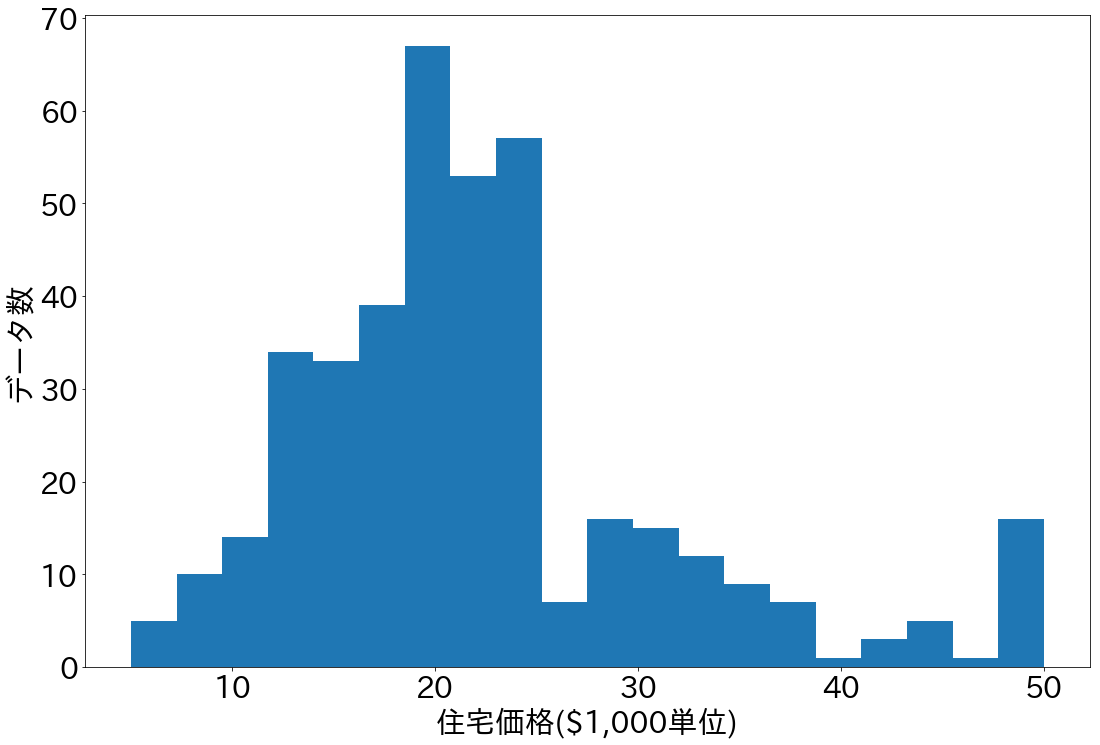

Text(0, 0.5, '住宅価格（$1,000単位）')

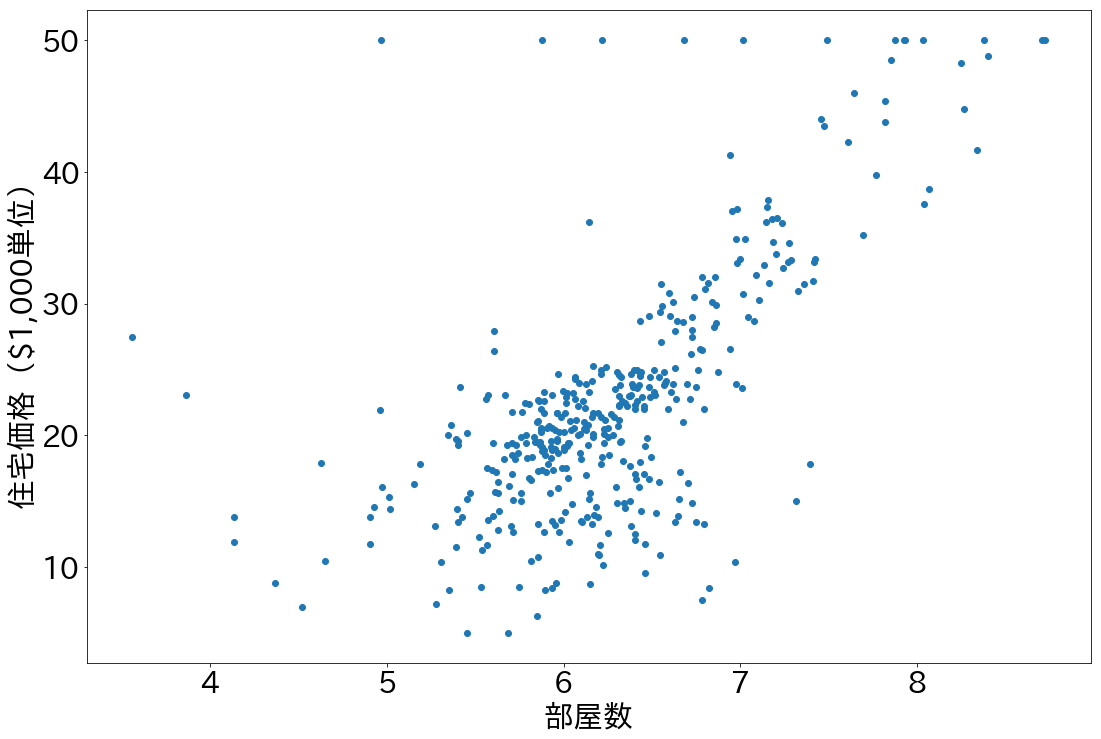

In [6]:
plt.rcParams['font.size'] = 10*3
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['font.family'] = ['IPAexGothic']

plt.hist(y_train, bins=20)
plt.xlabel('住宅価格($1,000単位)')
plt.ylabel('データ数')
plt.show()
plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('部屋数')
plt.ylabel('住宅価格（$1,000単位）')

## 3.6.5 データの前処理

機械学習モデルを構築する前に、データの標準化をしておきましょう。
具体的には、各変数ごとに平均値を引いて標準偏差（ばらつきの大きさを表す指標）で割ります。

Text(0, 0.5, '住宅価格(標準化後)')

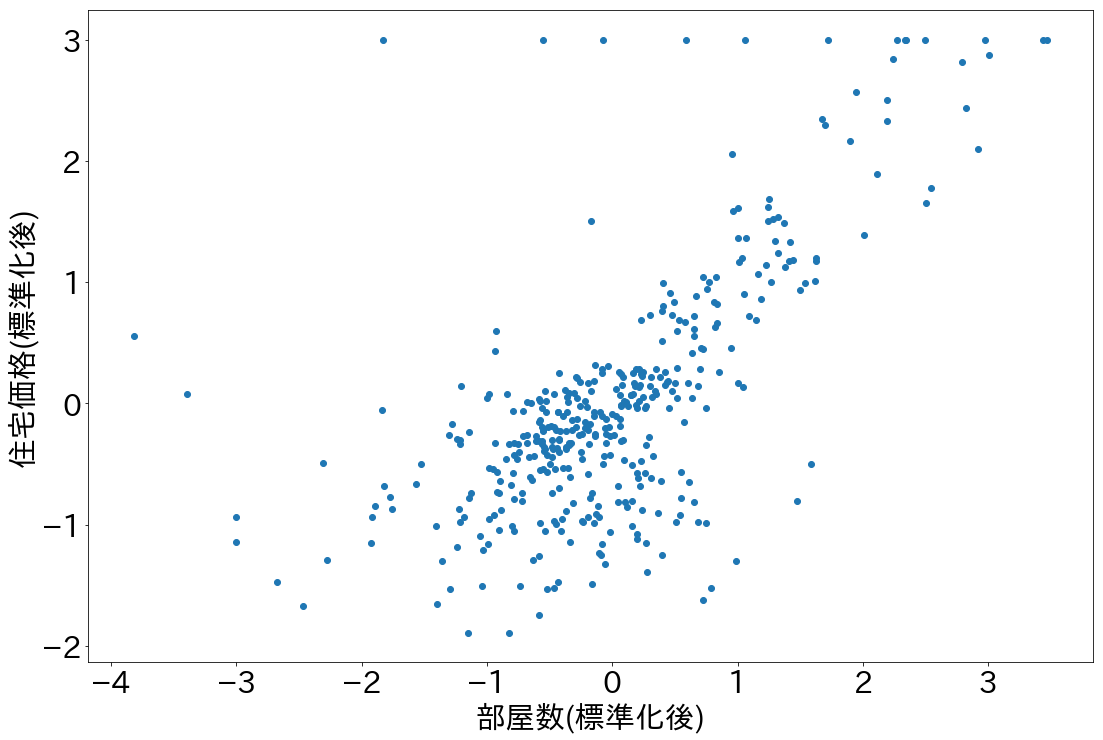

In [7]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean) / x_train_std
y_train = (y_train - y_train_mean) / y_train_std

# x_testに対してもx_train_meanとx_train_stdを使う
x_test = (x_test - x_train_mean) / x_train_std
# y_testに対してもy_train_meanとy_train_stdを使う
y_test = (y_test - y_train_mean) / y_train_std

plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('部屋数(標準化後)')
plt.ylabel('住宅価格(標準化後)')

## 3.6.6 モデルの定義

次に、モデルを定義します。このモデルを複雑にすればするほど表現力が上がりますが、ここではシンプルに「各説明変数を重み付きで足し合わせたもの」で住宅価格を推定することにします。重みの初期値は、1未満のランダムな値としておきます。

前述の通り、機械学習では誤差を最小化するようにパラメータを学習します。ここでは、変数wがパラメータで、predが予測結果を表すテンソル、つまりモデルです。

In [9]:
# 説明変数用のプレースホルダー
x = tf.placeholder(tf.float32, (None, 13), name='x')
# 正解データ（住宅価格）用のプレースホルダー
y = tf.placeholder(tf.float32, (None, 1), name='y')

# 説明変数を重みwで足し合わせただけの簡単なモデル
w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w)

## 3.6.7 損失関数の定義と学習

モデルを定義できたら、次は最適化です。前述の通り、機械学習では誤差を最小化するようにパラメータを学習します。最小化したい関数のことを目的関数、もしくは損失関数と呼びます。

ここでは、実測値と推定値の差の二乗の平均を表す最小二乗誤差（MSE:Mean Squared Error)を損失関数としています。最適化のステップはtf.train.GradientDescentOptimizerを使って定義します。

In [10]:
# 実測値と推定値の差の二乗の平均を誤差とする
loss = tf.reduce_mean((y - pred) ** 2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

最後にtrain_stepを使って最適化のループを回します。先ほど定義したプレースホルダーの$x$と$y$に、標準化したx_trainとy_trainを代入しています。

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_losses = []
    for step in range(100):
        # train_stepがNoneを返すので、_で受けておく
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict={
                x: x_train,
                # y_trainとyの次元を揃えるためにreshapeが必要
                y: y_train.reshape((-1, 1))
            }
        )
        print('step: {}, train_loss: {}'.format(step, train_loss))
        train_losses.append(train_loss)
        
        # 学習が終わったら、評価用データに対して予測してみる
        pred_ = sess.run(
            pred,
            feed_dict={
                x: x_test
            }
        )

step: 0, train_loss: 7.919197082519531
step: 1, train_loss: 4.658381462097168
step: 2, train_loss: 3.3876209259033203
step: 3, train_loss: 2.6125266551971436
step: 4, train_loss: 2.097531318664551
step: 5, train_loss: 1.7411949634552002
step: 6, train_loss: 1.4857916831970215
step: 7, train_loss: 1.2966506481170654
step: 8, train_loss: 1.1523407697677612
step: 9, train_loss: 1.039252519607544
step: 10, train_loss: 0.9485135078430176
step: 11, train_loss: 0.8741898536682129
step: 12, train_loss: 0.8122152090072632
step: 13, train_loss: 0.7597395181655884
step: 14, train_loss: 0.7147219181060791
step: 15, train_loss: 0.6756715774536133
step: 16, train_loss: 0.6414785385131836
step: 17, train_loss: 0.6113006472587585
step: 18, train_loss: 0.5844886898994446
step: 19, train_loss: 0.5605323314666748
step: 20, train_loss: 0.5390256643295288
step: 21, train_loss: 0.5196388959884644
step: 22, train_loss: 0.5021019577980042
step: 23, train_loss: 0.4861898422241211
step: 24, train_loss: 0.471713

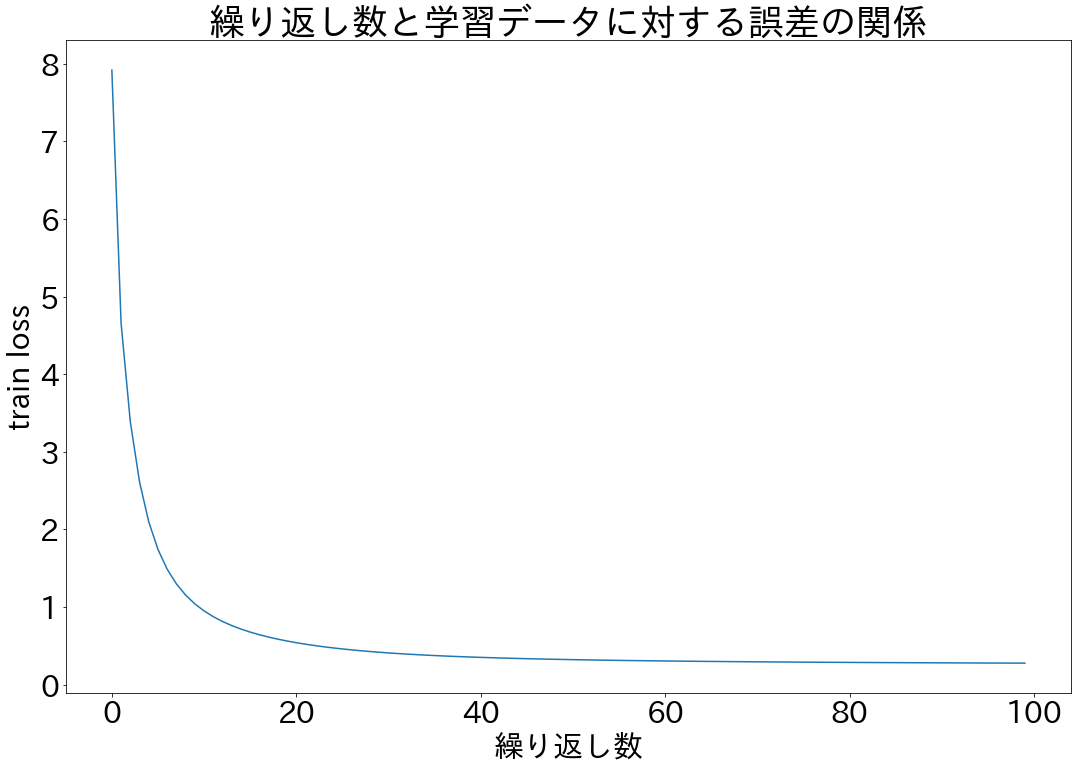

In [14]:
plt.plot(train_losses)
plt.title('繰り返し数と学習データに対する誤差の関係')
plt.xlabel('繰り返し数')
plt.ylabel('train loss')
plt.show()

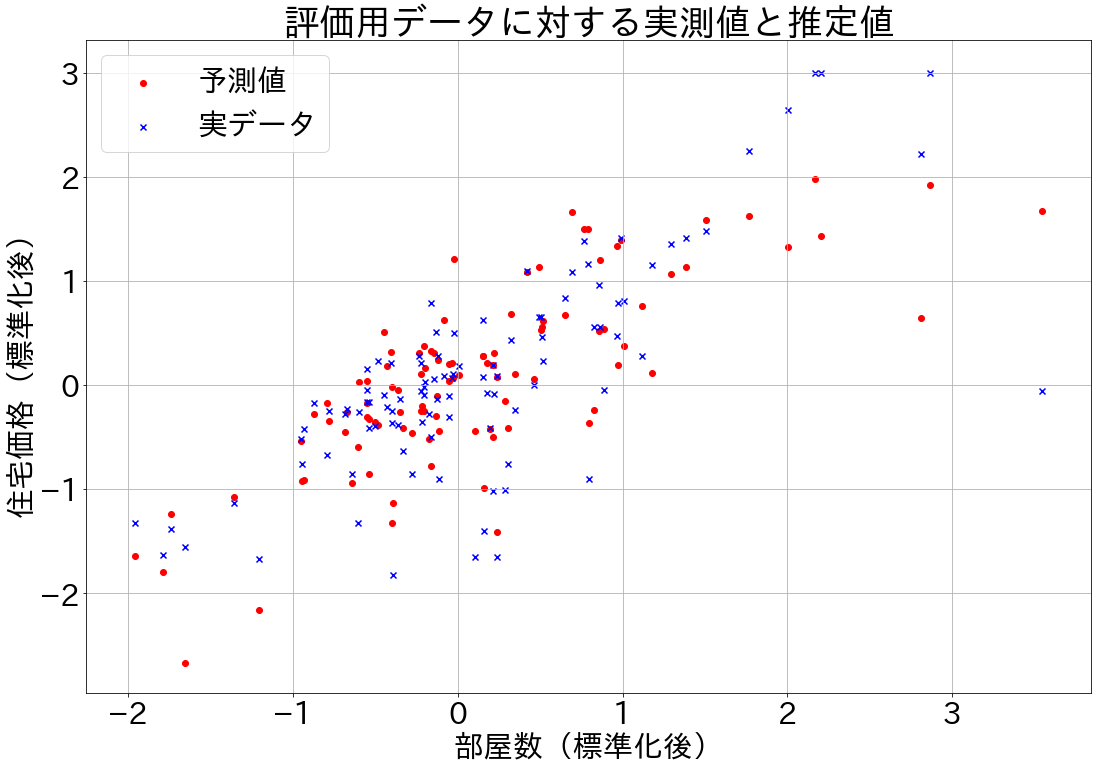

In [26]:
plt.scatter(x_test[:, 5], pred_, c='red', marker='o', label='予測値')
plt.scatter(x_test[:, 5], y_test, c='blue',marker='x', label='実データ')

plt.title('評価用データに対する実測値と推定値')
plt.xlabel('部屋数（標準化後）')
plt.ylabel('住宅価格（標準化後）')
plt.legend()
plt.grid(True)

plt.show()

## 3.6.8 確率的勾配降下法とミニバッチ

ここまでで、最急降下法を使って簡単な機械学習モデルを学習することができました。今回利用したデータセットは、データ数が高々506という小さなものだったので。すべてのデータを一度にメモリ上に展開し、最適化を実行してきました。しかし、実際の現場では、数十万～数百万のデータを取り扱うことがよくあります。また、次章以降で詳細を取り扱う深層学習には、一般に大量のデータが必要だと言われています。そういった場合には、最急降下法のオンライン版のアルゴリズムである確率的勾配降下法(Stochastic Gradient Descent, SGD)を利用します。SGDでは、データすべてを一度に使うのではなく、「ミニバッチ」と呼ばれる塊に分割して学習します。ミニバッチに分割することで、d－多が大量でも対応できるだけでなく、挙動が確率的になり、局所的に陥りづらくなるといったメリットもあるため、実際にはデータが大量でなかったとしてもGSD(もしくはGSDの派生型)を利用するのが一般的です。

In [27]:
import numpy as np

In [28]:
# ミニバッチを1つずつ返すジェネレータ
def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # 元データからランダムにbatch_size個ずつ抽出する
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch

In [32]:
# ミニバッチのサイズ
BATCH_SIZE = 32

step = 0
epoch_num = 0
train_losses = []
with tf.Session()as sess:
    sess.run(tf.global_variables_initializer())
    # 100エポック回す
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train, y_train, 32):
            train_loss, _ = sess.run(
                [loss, train_step],
                feed_dict = {
                    x: x_batch,
                    y: y_batch.reshape((-1, 1))
                }
            )
            # print('step: {}, train_loss: {}'.format(step, train_loss))
            step += 1
        print('epoch: {}, train_loss: {}'.format(epoch_num, train_loss))
        train_losses.append(train_loss)
        epoch_num += 1

    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

epoch: 0, train_loss: 0.5911372900009155
epoch: 1, train_loss: 1.1366329193115234
epoch: 2, train_loss: 0.15519730746746063
epoch: 3, train_loss: 0.36061525344848633
epoch: 4, train_loss: 0.271783709526062
epoch: 5, train_loss: 0.16348880529403687
epoch: 6, train_loss: 0.25149238109588623
epoch: 7, train_loss: 0.7811405062675476
epoch: 8, train_loss: 0.2771044373512268
epoch: 9, train_loss: 0.22534170746803284
epoch: 10, train_loss: 0.1858774870634079
epoch: 11, train_loss: 0.3602454662322998
epoch: 12, train_loss: 0.1684158742427826
epoch: 13, train_loss: 0.16330868005752563
epoch: 14, train_loss: 0.3019976019859314
epoch: 15, train_loss: 0.1664995551109314
epoch: 16, train_loss: 0.21488933265209198
epoch: 17, train_loss: 0.0920039564371109
epoch: 18, train_loss: 0.29124540090560913
epoch: 19, train_loss: 0.42061227560043335
epoch: 20, train_loss: 0.5142483115196228
epoch: 21, train_loss: 0.2557731866836548
epoch: 22, train_loss: 0.38739243149757385
epoch: 23, train_loss: 0.2092355936